In [44]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy
from scipy.sparse import diags
from QLT_equations.testoblique import dydt 

In [46]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [47]:
t_ = np.load("oblique_t.npy")
y_ = np.load("oblique_y.npy")

In [48]:
y_

array([[2.49640000e-05, 2.49640662e-05, 2.49641326e-05, ...,
        3.59684067e-05, 3.59104956e-05, 3.58011020e-05],
       [2.49640000e-05, 2.49643123e-05, 2.49646254e-05, ...,
        5.18317748e-05, 5.19985614e-05, 5.23178948e-05],
       [3.12050000e-05, 3.12050076e-05, 3.12050152e-05, ...,
        3.19620724e-05, 3.20009128e-05, 3.20763675e-05],
       ...,
       [1.00000000e-09, 1.00117988e-09, 1.00236104e-09, ...,
        1.94569408e-09, 1.94569408e-09, 1.94569408e-09],
       [1.00000000e-09, 1.00099210e-09, 1.00198510e-09, ...,
        1.60253553e-09, 1.60253553e-09, 1.60253553e-09],
       [1.00000000e-09, 1.00080773e-09, 1.00161602e-09, ...,
        1.17030430e-09, 1.17030430e-09, 1.17030430e-09]])

In [49]:
# parameters from 2021 paper 
# normalization (vadim parameters)
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
omega_0 = 0.5 # Omega_ce
omega_pe = 4 # Omgea_{ce}

n_c = 4/5 # n^e_0

# thermal velocity 
alpha_c_par = 0.0079 # d_e x Omega_ce
alpha_c_perp = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_c_par / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_c_par # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
E0 = 5e-9
K_perp_0 = (alpha_c_perp**2 / 2) * n_c
K_par_0 = (alpha_c_par**2 / 2) * n_c
T_perp_0 = (alpha_c_perp**2 / 2) 
T_par_0 = (alpha_c_par**2 / 2) 
k_0 = 1 # d_e
dB0 = 4*np.pi * 2.5 * 1e-5 # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}

# max time 
t_max = 600

In [50]:
k_perp_ = np.linspace(8, 50, 30)
k_par_ = np.sqrt((omega_0**2) / (1-omega_0**2))*k_perp_
sol_ = np.zeros((len(k_perp_)), dtype="complex128")
k_abs = np.zeros((len(k_perp_)))

In [51]:
dk_perp = np.abs(k_perp_[1] - k_perp_[0])
dk_par = np.abs(k_par_[1] - k_par_[0])

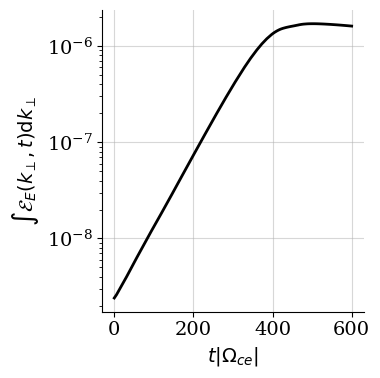

In [52]:
fig, ax = plt.subplots(figsize=(4, 4))
potential_energy = np.sum(y_[6:, :], axis=0)*dk_perp*dk_par/(8*np.pi)
ax.set_yscale("log")
ax.plot(t_, potential_energy, color="black", linewidth=2)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}_{E}(k_{\perp}, t) \mathrm{d} k_{\perp}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/secondary_QLT/oblique/perp_potential_energy.png", dpi=300, bbox_inches='tight')


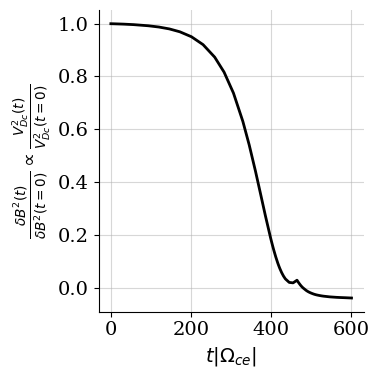

In [53]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t_, y_[4, :]/y_[4, 0], color="black", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{\delta B^2(t)}{\delta B^2(t=0)} \propto \frac{V_{Dc}^2(t)}{V_{Dc}^2(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/secondary_QLT/oblique/oblique_magnetic_energy.png", dpi=300, bbox_inches='tight')

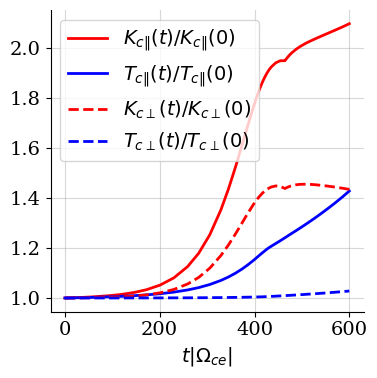

In [54]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t_, y_[1, :]/y_[1, 0], color="red", linewidth=2, label="$K_{c\|}(t)/K_{c\|}(0)$")
ax.plot(t_, y_[3, :]/y_[3, 0], color="blue", linewidth=2, label="$T_{c\|}(t)/T_{c\|}(0)$")

ax.plot(t_, y_[0, :]/y_[0, 0], color="red", linewidth=2, ls="--", label="$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.plot(t_, y_[2, :]/y_[2, 0], color="blue", linewidth=2, ls="--", label="$T_{c\perp}(t)/T_{c\perp}(0)$")

ax.legend()
ax.set_xlabel("$t|\Omega_{ce}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/secondary_QLT/oblique/oblique_kinetic_energy_par.png", dpi=300, bbox_inches='tight')

NameError: name 'result' is not defined

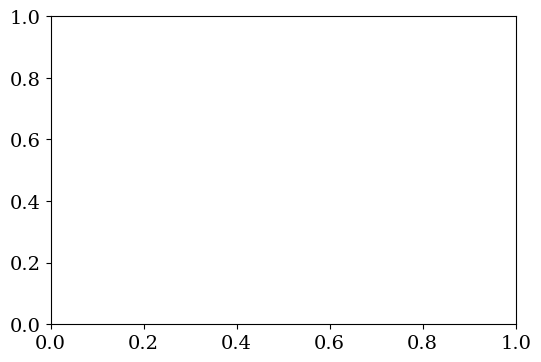

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))
kinetic_energy = result.y[0, :] + 0.5 * result.y[1, :]
potential_energy = np.sum(result.y[6:, :], axis=0)*dk_perp*dk_par/2/np.pi
magnetic_energy = (1 + (omega_0/k_0/omega_pe)**2) * result.y[4, :]/4/np.pi 
total_energy = kinetic_energy + magnetic_energy + potential_energy 

ax.plot(result.t, kinetic_energy - kinetic_energy[0], color="black", linewidth=2, label="$\Delta K$")
ax.plot(result.t, magnetic_energy - magnetic_energy[0], color="red", linewidth=2, label="$\Delta B_{W} + \Delta E_{W}$")
ax.plot(result.t, potential_energy - potential_energy[0], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax.plot(result.t, total_energy - total_energy[0], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax.set_yscale("symlog", linthresh=1e-10)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\Delta E$')

legend = ax.legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/secondary_QLT/energy_conservation_oblique.png", dpi=300, bbox_inches='tight')